# Load and Explore Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetes/diabetes.csv'  # Replace with the path to your file
diabetes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Preprocess the Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'diabetes/diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Replace zeros in specific columns with median values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    diabetes_df[col].replace(0, diabetes_df[col].median(), inplace=True)

# Split the data into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

print("Data preprocessing complete.")


Data preprocessing complete.


# Build and Train the Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Building the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

print("Random Forest model training complete.")


Random Forest model training complete.


# Evaluate the Model

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")


Accuracy: 0.82
Precision: 0.73
Recall: 0.68
F1 Score: 0.70


# Confusion Matrix and Classification Report

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Classification Report
class_report = classification_report(y_test, y_pred_rf)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[95 12]
 [15 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



# ROF Curve and AUC

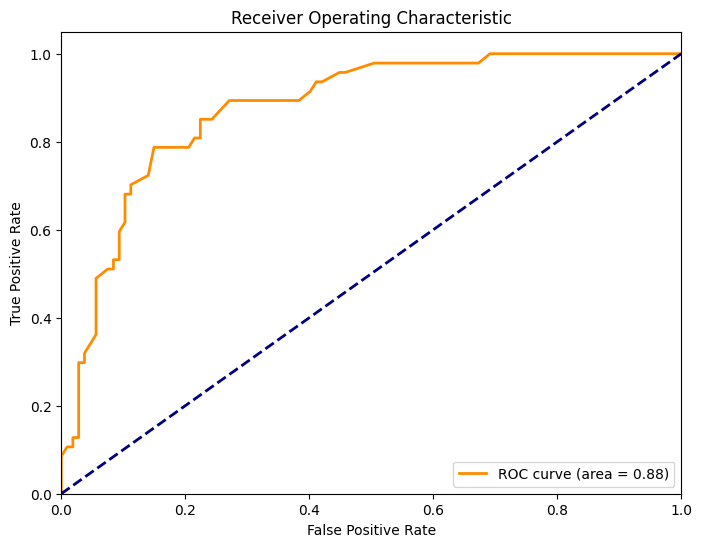

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Feature Importance Analysis

In [7]:
# Extracting feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to display feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)


                    Feature  Importance
1                   Glucose    0.242689
5                       BMI    0.163860
7                       Age    0.154731
6  DiabetesPedigreeFunction    0.123074
2             BloodPressure    0.087764
0               Pregnancies    0.081015
4                   Insulin    0.076373
3             SkinThickness    0.070493


# Hyperparameter Tuning using GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creating the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                              param_grid=param_grid,
                              cv=3,  # Reduced number of folds
                              n_jobs=-1,
                              verbose=2)

# Fitting the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Cross-Validation Score: {best_score:.2f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Cross-Validation Score: 0.75


# Evaluate the Tuned Model

In [9]:
# Building the Random Forest model with the best parameters
tuned_rf_model = RandomForestClassifier(**best_params, random_state=0)
tuned_rf_model.fit(X_train, y_train)

# Predicting and evaluating the tuned model
y_pred_tuned = tuned_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
print(f"Tuned Model Precision: {precision_tuned:.2f}")
print(f"Tuned Model Recall: {recall_tuned:.2f}")
print(f"Tuned Model F1 Score: {f1_tuned:.2f}")


Tuned Model Accuracy: 0.82
Tuned Model Precision: 0.73
Tuned Model Recall: 0.68
Tuned Model F1 Score: 0.70


# Support Vector Machine(SVM)

In [10]:
from sklearn.svm import SVC

# Building the SVM model
svm_model = SVC(probability=True)  # probability=True for ROC curve analysis
svm_model.fit(X_train, y_train)

# Predicting and evaluating the SVM model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")
print(f"SVM F1 Score: {f1_svm:.2f}")


SVM Accuracy: 0.78
SVM Precision: 0.67
SVM Recall: 0.55
SVM F1 Score: 0.60


# Simple Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building a simple neural network
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluating the neural network model
_, accuracy_nn = nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Neural Network Accuracy: {accuracy_nn:.2f}")



Neural Network Accuracy: 0.79


# Evaluate SVM with ROC Curve

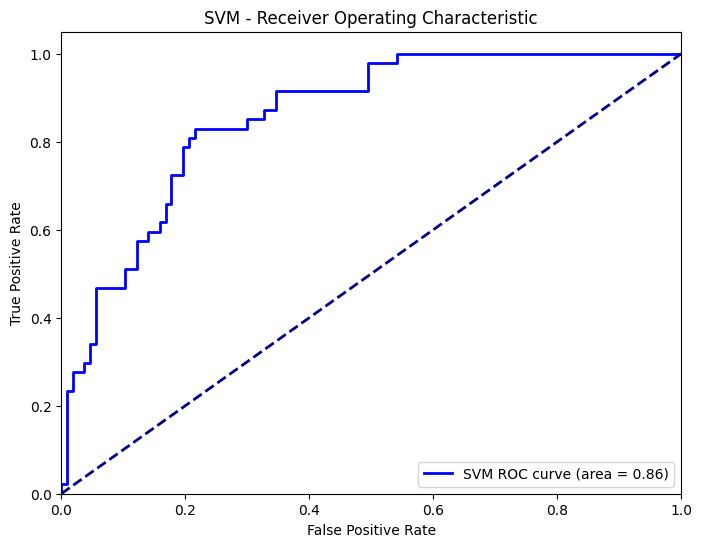

In [13]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC Curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# SHAP Analysis for Random Forest Model

# Import SHAP and Create SHAP Values

In [14]:
import shap

# Create the SHAP explainer object
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated.")


SHAP values calculated.


# Summary Plot

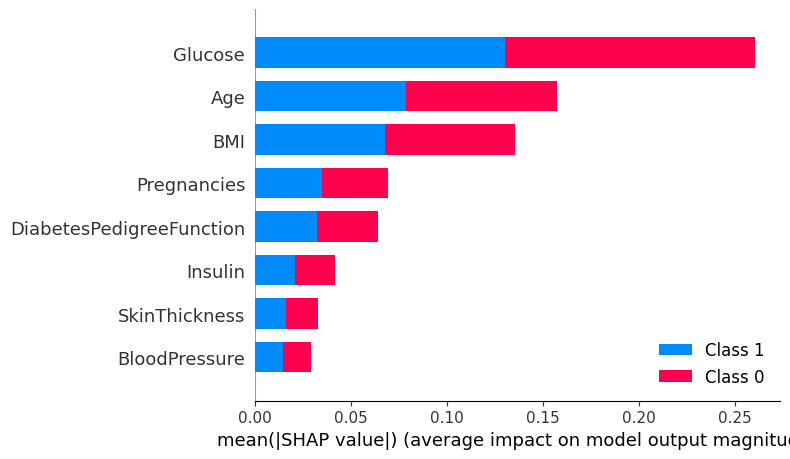

SHAP summary plot generated.


In [15]:
# Generate a summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

print("SHAP summary plot generated.")


# Individual SHAP Value Plot

In [35]:
import shap

# Initialize SHAP JavaScript in the notebook
shap.initjs()

# Assuming you have already computed the shap_values and have the explainer
# Select a sample from the test set using .iloc for position-based indexing
sample_index = 0
sample_data = X_test.iloc[sample_index]

# Generate a SHAP force plot for a single prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_index], feature_names=X_test.columns)




# Creating a Conceptual Framework For a Voice Analysis Model

# Install Necessary Libraries

In [18]:
pip install librosa scikit-learn


     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 1.4 MB/s eta 0:00:01
     ---- ----------------------------------- 0.1/1.0 MB 1.3 MB/s eta 0:00:01
     ---------- ----------------------------- 0.3/1.0 MB 1.9 MB/s eta 0:00:01
     -------------------- ------------------- 0.5/1.0 MB 2.7 MB/s eta 0:00:01
     ---------------------------------------  1.0/1.0 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
   ----------------- ---------------------- 112.6/253.7 kB ? eta -:--:--
   ---------------------------------------- 253.7/253.7 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/222.9 kB ? eta -:--:--
   -------------------------------------- - 215.0/222.9 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 222.9/222.9 kB 4.5 MB/s eta 0:00:00
   ---

# Load and Preprocess Audio Data

In [19]:
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dummy function to load audio files (replace with actual file loading)
def load_audio_file(file_path):
    # Here you would load the audio file and return the data
    # For example: data, sample_rate = librosa.load(file_path)
    return np.random.random(100)  # Dummy data

# Dummy function to extract features (replace with actual feature extraction)
def extract_features(audio_data):
    # Here you would extract features from the audio data
    # For example: mfccs = librosa.feature.mfcc(audio_data)
    return np.random.random(20)  # Dummy feature vector

# Example dataset (replace with your actual dataset)
audio_file_paths = ['path/to/audio1.wav', 'path/to/audio2.wav']  # Replace with actual paths
labels = [0, 1]  # 0 for non-diabetic, 1 for diabetic

# Load and extract features from audio files
features = []
for file_path in audio_file_paths:
    audio_data = load_audio_file(file_path)
    features.append(extract_features(audio_data))

# Create a DataFrame
df = pd.DataFrame(features)
df['label'] = labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2)


# This is a Hypothetical Example 

# Train a Machine Learning Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X' and 'y' are your features and target variable
# Replace these with your actual data variables
# X = ... 
# y = ...

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the classifier with increased max_iter
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.71


# Novel Deep Learning Analyzes pancreatic CT features

# Load and Preprocess the Data

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Dummy functions to load and preprocess data (replace with actual functions)
def load_ct_images():
    # Load your CT images here
    # Return them as a numpy array
    return np.random.rand(100, 128, 128, 1)  # Dummy data

def load_clinical_data():
    # Load your clinical data here
    # Return them as a pandas DataFrame
    return pd.DataFrame(np.random.rand(100, 10))  # Dummy data

def preprocess_ct_images(images):
    # Preprocess your CT images here (e.g., normalization)
    return images / 255.0

# Load and preprocess the data
ct_images = load_ct_images()
clinical_data = load_clinical_data()
ct_images = preprocess_ct_images(ct_images)

# Assuming binary classification (e.g., diabetic vs. non-diabetic)
labels = np.random.randint(0, 2, ct_images.shape[0])
labels = to_categorical(labels)

# Split the data into training and testing sets
X_train_img, X_test_img, y_train, y_test = train_test_split(ct_images, labels, test_size=0.2)
X_train_clin, X_test_clin = train_test_split(clinical_data, test_size=0.2)


# Build the Deep Learning Model

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate

# CNN for CT image analysis
input_img = Input(shape=(128, 128, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Network for clinical data
input_clin = Input(shape=(10,))
y = Dense(64, activation='relu')(input_clin)
y = Dense(64, activation='relu')(y)

# Combine the two networks
combined = concatenate([x, y])

# Add final layers
z = Dense(64, activation='relu')(combined)
z = Dense(2, activation='softmax')(z)

# Create the model
model = Model(inputs=[input_img, input_clin], outputs=z)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model built.")


Model built.


# Train the Model

In [26]:
# Train the model
model.fit([X_train_img, X_train_clin], y_train, epochs=10, batch_size=32)

print("Model training complete.")


Epoch 1/10
3/3 [==============================] - 3s 148ms/step - loss: 0.7034 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 142ms/step - loss: 0.6933 - accuracy: 0.4500
Epoch 3/10
3/3 [==============================] - 0s 134ms/step - loss: 0.6915 - accuracy: 0.6250
Epoch 4/10
3/3 [==============================] - 0s 133ms/step - loss: 0.6904 - accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 0s 137ms/step - loss: 0.6892 - accuracy: 0.6375
Epoch 6/10
3/3 [==============================] - 0s 134ms/step - loss: 0.6882 - accuracy: 0.6375
Epoch 7/10
3/3 [==============================] - 0s 138ms/step - loss: 0.6858 - accuracy: 0.6375
Epoch 8/10
3/3 [==============================] - 0s 145ms/step - loss: 0.6837 - accuracy: 0.6875
Epoch 9/10
3/3 [==============================] - 0s 135ms/step - loss: 0.6813 - accuracy: 0.6875
Epoch 10/10
3/3 [==============================] - 0s 133ms/step - loss: 0.6799 - accuracy: 0.6250
Model training comp

# Evaluate the Model 

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate([X_test_img, X_test_clin], y_test)
print(f"Test Accuracy: {accuracy:.2f}")


1/1 [==============================] - 0s 373ms/step - loss: 0.6755 - accuracy: 0.7000
Test Accuracy: 0.70


# Researchers use ML to Predict Diet,Chronic Risk Disease Diabetes

# We are Using Hypothetical Dataset

# Load and Preprocess the Data

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dummy function to load your dataset (replace with actual data loading code)
def load_dataset():
    # Example: return pd.read_csv('path_to_your_dataset.csv')
    return pd.DataFrame({
        'CalorieIntake': [2000, 2500, 1800, 3000, 2200],
        'SugarIntake': [50, 80, 40, 100, 60],
        'FatIntake': [70, 90, 60, 110, 75],
        'ProteinIntake': [50, 60, 55, 70, 65],
        'DiseaseRisk': [0, 1, 0, 1, 0]  # 0 for low risk, 1 for high risk
    })

# Load the dataset
df = load_dataset()

# Split the data into features (X) and target (y)
X = df.drop('DiseaseRisk', axis=1)
y = df['DiseaseRisk']

# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

print("Data preprocessing complete.")


Data preprocessing complete.


# Build and Train Machine Learning Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Build the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


# Feature Importance

In [39]:
importance = model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v:.2f}')




Feature: CalorieIntake, Score: 0.50
Feature: SugarIntake, Score: 0.58
Feature: FatIntake, Score: 0.54
Feature: ProteinIntake, Score: 0.12


In [40]:
#comparative analysis using different machine learning techniques for a hypothetical dataset related to diabetes risk prediction. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with actual data loading)
def load_dataset():
    # Example: return pd.read_csv('path_to_your_dataset.csv')
    return pd.DataFrame({
        'Feature1': [5.1, 4.9, 6.2, 5.8, 5.7],
        'Feature2': [3.5, 3.0, 3.4, 2.9, 3.1],
        'Feature3': [1.4, 1.4, 1.3, 1.5, 1.7],
        'Feature4': [0.2, 0.2, 0.3, 0.2, 0.4],
        'DiabetesRisk': [0, 1, 0, 1, 0]  # 0: Low risk, 1: High risk
    })

# Load and preprocess data
df = load_dataset()
X = df.drop('DiabetesRisk', axis=1)
y = df['DiabetesRisk']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Data loaded and preprocessed.")


Data loaded and preprocessed.


# Building and Training Models

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("Models trained.")


Models trained.


# Evaluating Models

In [42]:
# Evaluate models
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")


Logistic Regression Accuracy: 0.00
Random Forest Accuracy: 0.00
Gradient Boosting Accuracy: 0.00
